# Anime Recommender 02: Data Cleaning & EDA

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

## Animes

In [2]:
anime_db = pd.read_csv("../data/anime_db.csv", encoding='utf-8')
print(anime_db.shape)
anime_db.head()

(15954, 20)


,id,status,genres,format,description,startDate,endDate,episodes,season,seasonYear,duration,averageScore,meanScore,popularity,relations,siteUrl,title_romaji,title_english,coverImage_large,coverImage_medium
0,1,FINISHED,"Action, Adventure, Drama, Sci-Fi",TV,"Enter a world in the distant future, where Bou...",1998-04-03,1999-04-24,26.0,SPRING,1998.0,24.0,86.0,86.0,249940,"5, 17205, 4037",https://anilist.co/anime/1,Cowboy Bebop,Cowboy Bebop,https://s4.anilist.co/file/anilistcdn/media/an...,https://s4.anilist.co/file/anilistcdn/media/an...
1,5,FINISHED,"Action, Drama, Mystery, Sci-Fi",MOVIE,"As the Cowboy Bebop crew travels the stars, th...",2001-09-01,2001-09-01,1.0,SUMMER,2001.0,115.0,82.0,82.0,47081,1,https://anilist.co/anime/5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie - Knockin' on Heaven's...,https://s4.anilist.co/file/anilistcdn/media/an...,https://s4.anilist.co/file/anilistcdn/media/an...
2,6,FINISHED,"Action, Adventure, Comedy, Drama, Sci-Fi",TV,Vash the Stampede is a wanted man with a habit...,1998-04-01,1998-09-30,26.0,SPRING,1998.0,24.0,79.0,79.0,81725,4106,https://anilist.co/anime/6,TRIGUN,Trigun,https://s4.anilist.co/file/anilistcdn/media/an...,https://s4.anilist.co/file/anilistcdn/media/an...
3,7,FINISHED,"Action, Drama, Mystery, Supernatural",TV,Robin Sena is a powerful craft user drafted in...,2002-07-02,2002-12-24,26.0,SUMMER,2002.0,25.0,68.0,68.0,11850,NaN,https://anilist.co/anime/7,Witch Hunter ROBIN,Witch Hunter ROBIN,https://s4.anilist.co/file/anilistcdn/media/an...,https://s4.anilist.co/file/anilistcdn/media/an...
4,8,FINISHED,"Adventure, Fantasy, Supernatural",TV,It is the dark century and the people are suff...,2004-09-30,2005-09-29,52.0,FALL,2004.0,23.0,62.0,64.0,1683,1123,https://anilist.co/anime/8,Bouken Ou Beet,Beet the Vandel Buster,https://s4.anilist.co/file/anilistcdn/media/an...,https://s4.anilist.co/file/anilistcdn/media/an...


In [3]:
anime_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15954 entries, 0 to 15953
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15954 non-null  int64  
 1   status             15951 non-null  object 
 2   genres             13885 non-null  object 
 3   format             15898 non-null  object 
 4   description        14879 non-null  object 
 5   startDate          13678 non-null  object 
 6   endDate            13353 non-null  object 
 7   episodes           15332 non-null  float64
 8   season             10608 non-null  object 
 9   seasonYear         10608 non-null  float64
 10  duration           15156 non-null  float64
 11  averageScore       10885 non-null  float64
 12  meanScore          15207 non-null  float64
 13  popularity         15954 non-null  int64  
 14  relations          8310 non-null   object 
 15  siteUrl            15954 non-null  object 
 16  title_romaji       159

In [4]:
anime_db_18 = pd.read_csv("../data/anime_db_18.csv", encoding='utf-8')
print(anime_db_18.shape)
anime_db_18.head()

(1432, 20)


,id,status,genres,format,description,startDate,endDate,episodes,season,seasonYear,duration,averageScore,meanScore,popularity,relations,siteUrl,title_romaji,title_english,coverImage_large,coverImage_medium
0,188,FINISHED,"Comedy, Hentai, Mystery, Supernatural",OVA,Masquerade is the story surrounding the Hiraga...,1998-09-25,1999-03-25,4.0,FALL,1998.0,30.0,51.0,54.0,448,4561,https://anilist.co/anime/188,Gosenzo San'e,Masquerade,https://s4.anilist.co/file/anilistcdn/media/an...,https://s4.anilist.co/file/anilistcdn/media/an...
1,203,FINISHED,"Adventure, Fantasy, Hentai",OVA,Based on the erotic game by Elf.<br>\n<br>\nTh...,1999-08-25,2000-11-25,5.0,SUMMER,1999.0,30.0,57.0,59.0,954,"2185, 125574",https://anilist.co/anime/203,Words Worth,NaN,https://s4.anilist.co/file/anilistcdn/media/an...,https://s4.anilist.co/file/anilistcdn/media/an...
2,211,FINISHED,Hentai,OVA,"Episode 1:<br>\n""There is no need for relation...",2001-09-25,2001-12-21,2.0,FALL,2001.0,30.0,52.0,55.0,483,NaN,https://anilist.co/anime/211,Pure Mail,NaN,https://s4.anilist.co/file/anilistcdn/media/an...,https://s4.anilist.co/file/anilistcdn/media/an...
3,213,FINISHED,"Comedy, Hentai, Romance",OVA,Yusuke Kinoshita is forced by his father to wo...,1997-10-24,1998-04-24,3.0,FALL,1997.0,29.0,48.0,51.0,451,"214, 215",https://anilist.co/anime/213,Pia Carrot e Youkoso!!,Welcome to Pia Carrot,https://s4.anilist.co/file/anilistcdn/media/an...,https://s4.anilist.co/file/anilistcdn/media/an...
4,214,FINISHED,"Comedy, Drama, Hentai, Romance",OVA,Yususke (from the first Pia Carrot series) ret...,1998-10-23,1999-04-23,3.0,FALL,1998.0,30.0,47.0,50.0,324,"213, 215",https://anilist.co/anime/214,Pia Carrot e Youkoso!! 2,Welcome To Pia Carrot 2,https://s4.anilist.co/file/anilistcdn/media/an...,https://s4.anilist.co/file/anilistcdn/media/an...


In [5]:
anime_db_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1432 entries, 0 to 1431
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1432 non-null   int64  
 1   status             1432 non-null   object 
 2   genres             1432 non-null   object 
 3   format             1432 non-null   object 
 4   description        1376 non-null   object 
 5   startDate          1415 non-null   object 
 6   endDate            1374 non-null   object 
 7   episodes           1390 non-null   float64
 8   season             1400 non-null   object 
 9   seasonYear         1400 non-null   float64
 10  duration           1425 non-null   float64
 11  averageScore       1320 non-null   float64
 12  meanScore          1420 non-null   float64
 13  popularity         1432 non-null   int64  
 14  relations          347 non-null    object 
 15  siteUrl            1432 non-null   object 
 16  title_romaji       1432 

In [6]:
anime_db['startDate']= pd.to_datetime(anime_db['startDate'], format='%Y-%m-%d')
anime_db['endDate']= pd.to_datetime(anime_db['endDate'], format='%Y-%m-%d')
anime_db_18['startDate']= pd.to_datetime(anime_db_18['startDate'], format='%Y-%m-%d')
anime_db_18['endDate']= pd.to_datetime(anime_db_18['endDate'], format='%Y-%m-%d')

In [7]:
def convert_to_list(data_row):
    return list(str(data_row).split(sep=", ")) if data_row is not np.nan else None

In [8]:
anime_db['relations'] = anime_db['relations'].apply(convert_to_list)
anime_db_18['relations'] = anime_db_18['relations'].apply(convert_to_list)

In [9]:
anime_db['genres_str'] = anime_db['genres']
anime_db['genres'] = anime_db['genres'].apply(convert_to_list)
anime_db_18['genres_str'] = anime_db_18['genres']
anime_db_18['genres'] = anime_db_18['genres'].apply(convert_to_list)

In [10]:
anime_db['status'].value_counts()

FINISHED            15076
NOT_YET_RELEASED      636
RELEASING             208
CANCELLED              31
Name: status, dtype: int64

In [11]:
anime_db_18['status'].value_counts()

FINISHED            1381
RELEASING             39
NOT_YET_RELEASED      12
Name: status, dtype: int64

We will drop records with status NOT_YET_RELEASED or CANCELLED, as NOT_YET_RELEASED animes should not have any user ratings and CANCELLED animes never aired

In [12]:
anime_db = anime_db[(anime_db['status']!="NOT_YET_RELEASED") & (anime_db['status']!="CANCELLED")]
anime_db_18 = anime_db_18[(anime_db_18['status']!="NOT_YET_RELEASED")]

We will drop records where the duration is less than 10 mins as these are either special episodes belonging to a anime franchise, or are one-off short episodes, which are not relevant in the scope of this recommender.

In [13]:
anime_db = anime_db[(anime_db['duration']>=10)]
anime_db_18 = anime_db_18[(anime_db_18['duration']>=10)]

In [14]:
anime_db['format'].value_counts()

TV          3813
MOVIE       2307
OVA         1993
SPECIAL      753
ONA          677
TV_SHORT     298
MUSIC         11
Name: format, dtype: int64

In [15]:
anime_db_18['format'].value_counts()

OVA        1341
ONA          12
MOVIE         5
SPECIAL       5
TV            1
Name: format, dtype: int64

We'll drop the 11 titles in MUSIC format in anime_db as they are not relevant in the scope of this recommender.

In [16]:
anime_db = anime_db[(anime_db['format']!="MUSIC")]

We'll deal with null values next

In [17]:
anime_db.isna().sum()

id                      0
status                  0
genres                295
format                  0
description           553
startDate             507
endDate               642
episodes               33
season               1475
seasonYear           1475
duration                0
averageScore         2065
meanScore              81
popularity              0
relations            3632
siteUrl                 0
title_romaji            0
title_english        4361
coverImage_large        0
coverImage_medium       0
genres_str            295
dtype: int64

In [18]:
anime_db_18.isna().sum()

id                      0
status                  0
genres                  0
format                  0
description            48
startDate               8
endDate                46
episodes               35
season                 14
seasonYear             14
duration                0
averageScore           92
meanScore               0
popularity              0
relations            1045
siteUrl                 0
title_romaji            0
title_english         918
coverImage_large        0
coverImage_medium       0
genres_str              0
dtype: int64

Null values in these columns are inconsequential: description, startDate, endDate, episodes, season, seasonYear, relations, title_english

We will fill description with "No description available" in case we want to populate the description in the output of the recommender, and title_english with its corresponding title_romaji since the null values just means it does not have an English title. We will leave the other columns (as stated above) as is, since they are inconsequential.

In [19]:
anime_db['description'].fillna("No description available", inplace=True)
anime_db_18['description'].fillna("No description available", inplace=True)
anime_db['title_english'].fillna(anime_db['title_romaji'], inplace=True)
anime_db_18['title_english'].fillna(anime_db_18['title_romaji'], inplace=True)

averageScore is the weighted average and the meanScore is the actual average score. averageScore will be empty if not enough users have rated the anime, and meanScore will be empty if no users have rated the anime. We will drop records where meanScore is null.

In [20]:
anime_db.dropna(subset=['meanScore'],inplace=True)

In [21]:
anime_db['score_diff'] = anime_db['averageScore'] - anime_db['meanScore']
np.cumsum(abs(anime_db['score_diff']).value_counts(normalize=True).sort_index())

0.0     0.319573
1.0     0.581276
2.0     0.704604
3.0     0.795267
4.0     0.849408
5.0     0.893647
6.0     0.930427
7.0     0.956019
8.0     0.974151
9.0     0.984182
10.0    0.990355
11.0    0.993570
12.0    0.996013
13.0    0.998328
14.0    0.999100
15.0    0.999357
16.0    0.999614
17.0    0.999743
20.0    0.999871
21.0    1.000000
Name: score_diff, dtype: float64

In [22]:
anime_db_18['score_diff'] = anime_db_18['averageScore'] - anime_db_18['meanScore']
np.cumsum(abs(anime_db_18['score_diff']).value_counts(normalize=True).sort_index())

0.0     0.051887
1.0     0.264937
2.0     0.660377
3.0     0.908019
4.0     0.977201
5.0     0.992138
6.0     0.996855
7.0     0.997642
8.0     0.998428
9.0     0.999214
11.0    1.000000
Name: score_diff, dtype: float64

For majority of anime titles, the averageScore and meanScore does not differ that much, ~99% of titles have the averageScore differing from the meanScore by up to 10. As the score is on a scale of 1 to 100, 10 is merely a 10% difference. We will impute the null values in averageScore with the meanScore. Same goes for anime_db_18.

In [23]:
anime_db['averageScore'].fillna(anime_db['meanScore'], inplace=True)
anime_db_18['averageScore'].fillna(anime_db_18['meanScore'], inplace=True)

anime_db_18 has no more null values that need cleaning at this point.

In [24]:
def impute_genres(relation_ids,df):
    relation_id_to_use = -1
    
    if relation_ids is None or relation_ids is np.nan:
        return None
    
    for relation_id in relation_ids:
        if len(df[(df['id']==int(relation_id))]['genres']) > 0:
            relation_id_to_use = relation_id
            break
        
    return list(df[(df['id']==int(relation_id_to_use))]['genres'])[0] if relation_id_to_use != -1 else None

In [25]:
anime_db['relation_genres']=anime_db['relations']
anime_db['relation_genres']=anime_db['relation_genres'].apply(impute_genres, args=(anime_db,))
anime_db['genres'].fillna(anime_db['relation_genres'], inplace=True)

In [26]:
anime_db['genres'].isna().sum()

238

There are still null values in genres, but since there are only 238 null values (2.4%), we will drop them.

In [27]:
anime_db = anime_db[(anime_db['genres'].notna())]

## Users

In [29]:
user_db_lightfm = pd.read_csv("../data/user_list_lightfm.csv")
print(user_db_lightfm.shape)
user_db_lightfm.head()

(937799, 3)


,userId,mediaId,rating
0,710080,1535,70
1,710080,21459,70
2,710080,113415,70
3,710080,11757,70
4,710080,5114,70


Anilist has dirty data, where a user can have their settings on a POINT-5 or POINT-10 scale, but there are ratings higher than 5 or 10. As a result, some ratings might have been scaled wrongly during data collection so we will drop users with rating > 100 (indication that the scores were scaled wrongly)

In [30]:
users_to_drop = user_db_lightfm[user_db_lightfm['rating']>100]['userId'].unique()

In [31]:
user_db_lightfm = user_db_lightfm[~user_db_lightfm['userId'].isin(users_to_drop)]

In [32]:
rated_media_id = user_db_lightfm['mediaId'].unique()
media_ids = anime_db['id'].unique()

As the user list we scraped is just a subset of the Anilist user base, it is normal for the user_db to not have any ratings for some animes that are inside anime_db. 

Since we dropped quite a few animes during the data cleaning, we will drop those animes from user_db as well.

In [33]:
media_id_drop_from_users = []
media_id_drop_from_anime = []

for media_id in rated_media_id:
    if media_id not in media_ids:
        media_id_drop_from_users.append(media_id)
        
for media_id in media_ids:
    if media_id not in rated_media_id:
        media_id_drop_from_anime.append(media_id)

In [34]:
anime_db = anime_db[~anime_db['id'].isin(media_id_drop_from_anime)]

In [35]:
user_db_lightfm = user_db_lightfm[~user_db_lightfm['mediaId'].isin(media_id_drop_from_users)]

## Export cleaned anime_db and anime_db_18

In [36]:
anime_db.to_pickle("../data/anime_db_cleaned.pkl")
anime_db_18.to_pickle("../data/anime_db_18_cleaned.pkl")

## EDA

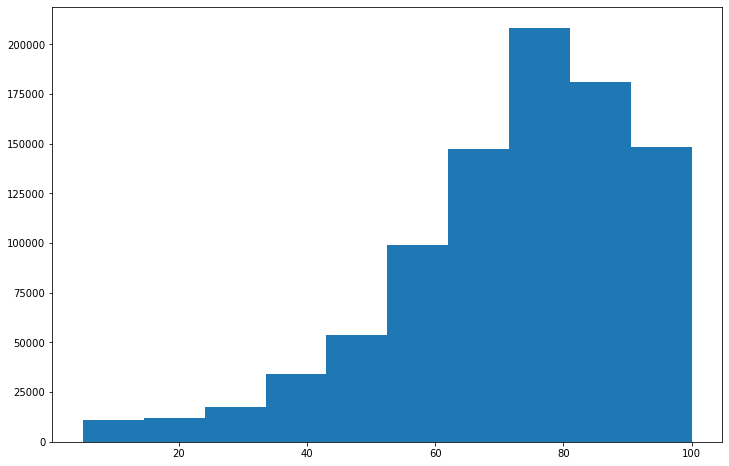

In [36]:
plt.figure(figsize=(12,8))
plt.hist(user_db_lightfm['rating'],bins=10);

In [37]:
user_db_lightfm['rating'].value_counts(normalize=True).cumsum()

80     0.185641
90     0.331654
70     0.471551
100    0.605392
60     0.705472
50     0.759831
85     0.812390
75     0.855194
40     0.890604
95     0.919183
65     0.941056
30     0.958902
20     0.971131
10     0.980687
55     0.989018
45     0.993323
5      0.995952
35     0.998154
25     0.999341
15     1.000000
Name: rating, dtype: float64

Majority of ratings are 60-100. 75% of ratings are >= 50. This could indicate that animes would generally have a high average score as ratings are heavily skewed to the higher end. Based on domain knowledge, even terrible animes can manage a score of > 50. This could be because the general viewer may see a rating below 50 as being too harsh. Those who rate < 50 are either haters or purists

In [38]:
rating_counts = pd.DataFrame(data=user_db_lightfm['mediaId'].value_counts())
rating_counts.columns = ['rating_counts']

In [39]:
top_10_popular = rating_counts.head(10).index
least_10_popular = rating_counts.tail(10).index

In [40]:
def get_ratings_count(anime_id):
    return rating_counts.loc[anime_id]

In [41]:
anime_db['ratings_count'] = anime_db['id'].apply(get_ratings_count)

In [42]:
anime_db[anime_db['id'].isin(top_10_popular)][['id','title_romaji','title_english','averageScore','ratings_count']].sort_values('ratings_count',ascending=False)

,id,title_romaji,title_english,averageScore,ratings_count
6510,16498,Shingeki no Kyojin,Attack on Titan,85.0,7946
9510,101922,Kimetsu no Yaiba,Demon Slayer: Kimetsu no Yaiba,85.0,7231
8167,21459,Boku no Hero Academia,My Hero Academia,78.0,7048
1331,1535,DEATH NOTE,Death Note,84.0,6930
7877,21087,One Punch Man,One-Punch Man,83.0,6335
7771,20958,Shingeki no Kyojin 2,Attack on Titan Season 2,85.0,6309
8475,21856,Boku no Hero Academia 2,My Hero Academia Season 2,81.0,5933
8217,21519,Kimi no Na wa.,Your Name.,86.0,5909
7767,20954,Koe no Katachi,A Silent Voice,88.0,5893
5754,11757,Sword Art Online,Sword Art Online,69.0,5814


In [43]:
anime_db[anime_db['id'].isin(least_10_popular)][['title_romaji','title_english','averageScore','ratings_count']]

,title_romaji,title_english,averageScore,ratings_count
1272,Hakugei Densetsu,Hakugei: Legend of the Moby Dick,59.0,1
1503,Muteki Kanban Musume,Ramen Fighter Miki,64.0,1
1775,Armored Dragon Legend Villgust,Armored Dragon Legend Villgust,51.0,1
2240,Kaette Kita Doraemon,Doraemon Comes Back,61.0,1
2345,Igano Kabamaru,Igano Kabamaru,66.0,1
2493,Yumedamaya Kidan,Yumedamaya Kidan,57.0,1
3682,Tiger Mask Nisei,Tiger Mask Nisei,64.0,1
3794,11 Piki no Neko to Ahoudori,Eleven Cats and an Albatross,46.0,1
7390,Uchuu Kyoudai: Apo's Dream,Space Brothers: Apo's Dream,48.0,1
14513,Douluo Dalu: Shan Yu Yu Lai,Douluo Dalu: Shan Yu Yu Lai,75.0,1


In [44]:
user_db_lightfm['userId'].value_counts().mean()

63.971528751753155

Based on the dataset, on average, a user rates about 64 animes. During the data collection, we excluded users who have less than 10 animes recorded in their Anilist account. The average number of ratings made per user is skewed. 

In [45]:
genre_counts = pd.DataFrame(data=anime_db['genres_str'].value_counts())
genre_counts.columns = ['genre_counts']
genre_counts.head(10)

,genre_counts
"Comedy, Slice of Life",210
Comedy,179
"Action, Adventure, Fantasy",109
"Action, Mecha, Sci-Fi",99
"Adventure, Comedy, Fantasy",95
"Action, Sci-Fi",95
Action,87
"Comedy, Romance, Slice of Life",80
"Comedy, Romance",80
"Action, Fantasy",72


In [46]:
dummy_genres = anime_db['genres_str'].str.get_dummies(', ')
dummy_genres.columns = "genres_" + (dummy_genres.columns.str.lower()).str.replace(" ","_")

In [47]:
anime_db = pd.concat([anime_db,dummy_genres],axis=1)

In [48]:
genre_count = []

for column in dummy_genres.columns:
    genre_count.append(anime_db[anime_db[column]==1][column].count())

In [49]:
genres_count_df = pd.DataFrame(data=[dummy_genres.columns.values,genre_count]).T
genres_count_df.columns = ['genre','count']

In [50]:
genres_count_df.sort_values('count',ascending=False)

,genre,count
2,genres_comedy,2694
0,genres_action,2477
3,genres_drama,1754
5,genres_fantasy,1657
1,genres_adventure,1630
13,genres_sci-fi,1501
12,genres_romance,1393
14,genres_slice_of_life,988
16,genres_supernatural,943
8,genres_mecha,603


## Exports

### Export anime id and titles mapping

For mapping model predictions to a title

In [42]:
anime_db_id_titles = anime_db[['id','title_romaji','title_english','relations','genres']]
anime_db_id_titles.head()

,id,title_romaji,title_english,relations,genres
0,1,Cowboy Bebop,Cowboy Bebop,"[5, 17205, 4037]","[Action, Adventure, Drama, Sci-Fi]"
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie - Knockin' on Heaven's...,[1],"[Action, Drama, Mystery, Sci-Fi]"
2,6,TRIGUN,Trigun,[4106],"[Action, Adventure, Comedy, Drama, Sci-Fi]"
3,7,Witch Hunter ROBIN,Witch Hunter ROBIN,None,"[Action, Drama, Mystery, Supernatural]"
4,8,Bouken Ou Beet,Beet the Vandel Buster,[1123],"[Adventure, Fantasy, Supernatural]"


In [43]:
id_genre_dict = anime_db_id_titles[['id','genres']]

In [44]:
id_genre_dict.set_index('id',inplace=True)
id_genre_dict = id_genre_dict.to_dict()

In [46]:
id_genre_dict = id_genre_dict['genres']

In [47]:
anime_db_18_id_titles = anime_db_18[['id','title_romaji','title_english','relations','genres']]
anime_db_18_id_titles.head()

,id,title_romaji,title_english,relations,genres
0,188,Gosenzo San'e,Masquerade,[4561],"[Comedy, Hentai, Mystery, Supernatural]"
1,203,Words Worth,Words Worth,"[2185, 125574]","[Adventure, Fantasy, Hentai]"
2,211,Pure Mail,Pure Mail,None,[Hentai]
3,213,Pia Carrot e Youkoso!!,Welcome to Pia Carrot,"[214, 215]","[Comedy, Hentai, Romance]"
4,214,Pia Carrot e Youkoso!! 2,Welcome To Pia Carrot 2,"[213, 215]","[Comedy, Drama, Hentai, Romance]"


In [48]:
anime_db_id_mapping = pd.concat([anime_db_id_titles,anime_db_18_id_titles])

In [49]:
anime_db_id_mapping.to_pickle("../data/anime_id_mapping.pkl")

### Export data for modelling

In [51]:
user_db_lightfm['genres'] = user_db_lightfm['mediaId'].map(id_genre_dict)

In [54]:
user_db_lightfm.to_pickle('../data/user_db_lightfm_genres.pkl')

### Export titles

For the webapp drop-down list

In [167]:
anime_db_id_mapping[anime_db_id_mapping['title_romaji']=="Shingeki no Kyojin 3"]

,id,title_romaji,title_english,relations,genres,all_relations,series_id,series_title_romaji,series_title_english
8966,99147,Shingeki no Kyojin 3,Attack on Titan Season 3,"[20958, 104578, 119113, 99634]","[Action, Drama, Fantasy, Mystery]","[99147, 20958, 104578, 119113, 99634]",20958,Shingeki no Kyojin 2,Attack on Titan Season 2


In [73]:
anime_db_id_mapping[~anime_db_id_mapping['relations'].isna()]

,id,title_romaji,title_english,relations,genres
0,1,Cowboy Bebop,Cowboy Bebop,"[5, 17205, 4037]","[Action, Adventure, Drama, Sci-Fi]"
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie - Knockin' on Heaven's...,[1],"[Action, Drama, Mystery, Sci-Fi]"
2,6,TRIGUN,Trigun,[4106],"[Action, Adventure, Comedy, Drama, Sci-Fi]"
4,8,Bouken Ou Beet,Beet the Vandel Buster,[1123],"[Adventure, Fantasy, Supernatural]"
5,15,Eyeshield 21,Eyeshield 21,"[1317, 6418]","[Action, Comedy, Sports]"
...,...,...,...,...,...
1386,132209,Kuroinu II The Animation,Kuroinu II The Animation,[11827],"[Fantasy, Hentai, Sci-Fi]"
1400,137799,Zoku Oujo & Onna Kishi W Dogehin Roshutsu: Chi...,Zoku Oujo & Onna Kishi W Dogehin Roshutsu: Chi...,[119491],"[Fantasy, Hentai]"
1404,138411,Mama x Holic: Miwaku no Mama to Ama Ama Kankei...,Mama x Holic: Miwaku no Mama to Ama Ama Kankei...,[111320],[Hentai]
1415,140788,Taimanin Shiranui: Inyoku no Dorei Shoufu,Taimanin Shiranui: Inyoku no Dorei Shoufu,[20860],[Hentai]


In [136]:
anime_db_id_mapping['all_relations'] = anime_db_id_mapping['id'].apply(convert_to_list) + anime_db_id_mapping['relations']

In [154]:
def get_series_id(data_row,df):
    if data_row is np.nan or data_row is None:
        return None
    relation_ids = [int(x) for x in data_row]
    relation_ids.sort()
    for relation_id in relation_ids:
        if len(df[df['id']==relation_id]['title_romaji']!=0) or len(df[df['id']==relation_id]['title_english']!=0):
            return relation_id
    
    return None

In [138]:
anime_db_id_mapping

,id,title_romaji,title_english,relations,genres,all_relations,series_id
0,1,Cowboy Bebop,Cowboy Bebop,"[5, 17205, 4037]","[Action, Adventure, Drama, Sci-Fi]","[1, 5, 17205, 4037]",
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie - Knockin' on Heaven's...,[1],"[Action, Drama, Mystery, Sci-Fi]","[5, 1]",
2,6,TRIGUN,Trigun,[4106],"[Action, Adventure, Comedy, Drama, Sci-Fi]","[6, 4106]",
3,7,Witch Hunter ROBIN,Witch Hunter ROBIN,None,"[Action, Drama, Mystery, Supernatural]",NaN,
4,8,Bouken Ou Beet,Beet the Vandel Buster,[1123],"[Adventure, Fantasy, Supernatural]","[8, 1123]",
...,...,...,...,...,...,...,...
1419,142117,Kimi wa Yasashiku Netorareru The Animation,Kimi wa Yasashiku Netorareru The Animation,None,[Hentai],NaN,
1421,142229,Eroriman,Eroriman,None,[Hentai],NaN,
1423,143118,Kemonokko Tsuushin: The Animation,Kemonokko Tsuushin: The Animation,None,[Hentai],NaN,
1424,143264,Shin Injuu Gakuen La☆Blue Girl,La Blue Girl,"[1274, 1272]",[Hentai],"[143264, 1274, 1272]",


In [155]:
anime_db_id_mapping['series_id'] = anime_db_id_mapping['all_relations'].apply(get_series_id,args=(anime_db_id_mapping,))
anime_db_id_mapping['series_id'].fillna(anime_db_id_mapping['id'],inplace=True)

In [156]:
anime_db_id_mapping['series_id'] = anime_db_id_mapping['series_id'].astype(np.int64)

In [161]:
def get_series_title_romaji(series_id, df):    
    return df[df['id']==series_id]['title_romaji'].values[0]

In [162]:
def get_series_title_english(series_id, df):    
    return df[df['id']==series_id]['title_english'].values[0]

In [163]:
anime_db_id_mapping['series_title_romaji'] = anime_db_id_mapping['series_id'].apply(get_series_title_romaji,args=(anime_db_id_mapping,))
anime_db_id_mapping['series_title_english'] = anime_db_id_mapping['series_id'].apply(get_series_title_english,args=(anime_db_id_mapping,))

In [166]:
anime_db_id_mapping

,id,title_romaji,title_english,relations,genres,all_relations,series_id,series_title_romaji,series_title_english
0,1,Cowboy Bebop,Cowboy Bebop,"[5, 17205, 4037]","[Action, Adventure, Drama, Sci-Fi]","[1, 5, 17205, 4037]",1,Cowboy Bebop,Cowboy Bebop
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie - Knockin' on Heaven's...,[1],"[Action, Drama, Mystery, Sci-Fi]","[5, 1]",1,Cowboy Bebop,Cowboy Bebop
2,6,TRIGUN,Trigun,[4106],"[Action, Adventure, Comedy, Drama, Sci-Fi]","[6, 4106]",6,TRIGUN,Trigun
3,7,Witch Hunter ROBIN,Witch Hunter ROBIN,None,"[Action, Drama, Mystery, Supernatural]",NaN,7,Witch Hunter ROBIN,Witch Hunter ROBIN
4,8,Bouken Ou Beet,Beet the Vandel Buster,[1123],"[Adventure, Fantasy, Supernatural]","[8, 1123]",8,Bouken Ou Beet,Beet the Vandel Buster
...,...,...,...,...,...,...,...,...,...
1419,142117,Kimi wa Yasashiku Netorareru The Animation,Kimi wa Yasashiku Netorareru The Animation,None,[Hentai],NaN,142117,Kimi wa Yasashiku Netorareru The Animation,Kimi wa Yasashiku Netorareru The Animation
1421,142229,Eroriman,Eroriman,None,[Hentai],NaN,142229,Eroriman,Eroriman
1423,143118,Kemonokko Tsuushin: The Animation,Kemonokko Tsuushin: The Animation,None,[Hentai],NaN,143118,Kemonokko Tsuushin: The Animation,Kemonokko Tsuushin: The Animation
1424,143264,Shin Injuu Gakuen La☆Blue Girl,La Blue Girl,"[1274, 1272]",[Hentai],"[143264, 1274, 1272]",1272,Injuu Gakuen La☆Blue Girl,La Blue Girl


In [35]:
anime_title_list_english = list(anime_db_id_mapping['series_title_english'].dropna().values)
anime_title_list_romaji = list(anime_db_id_mapping['series_title_romaji'].dropna().values)
anime_title_list = list(set(anime_title_list_english + anime_title_list_romaji))
anime_title_list.sort()

In [36]:
with open('../data/anime_titles.pkl', 'wb') as filehandle:
    pickle.dump(anime_title_list, filehandle)

In [37]:
anime_title_list_english_18 = list(anime_db_18['title_english'].dropna().values)
anime_title_list_romaji_18 = list(anime_db_18['title_romaji'].dropna().values)
anime_title_list_18 = list(set(anime_title_list_english_18 + anime_title_list_romaji_18))
anime_title_list_18.sort()

In [38]:
with open('../data/anime_titles_18.pkl', 'wb') as filehandle:
    pickle.dump(anime_title_list_18, filehandle)

### Export genres

For the webapp drop-down list

In [40]:
anime_genres = list(anime_db['genres'].dropna().values)
anime_genre_list = []

for genres in anime_genres:
    anime_genre_list.extend(genres)

anime_genre_list = list(set(anime_genre_list))
anime_genre_list.sort()

In [41]:
with open('../data/anime_genres.pkl', 'wb') as filehandle:
    pickle.dump(anime_genre_list, filehandle)